
# Derivation of Intensity in Young's Double Slit Experiment

In Young's double slit experiment, light waves from two slits interfere with each other, creating an interference pattern on a screen. The intensity of light at any point on the screen depends on the phase difference between the waves arriving from the two slits.

## Path Difference and Phase Difference

Consider two slits separated by a distance \($ d $\). Let \( $D$ \) be the distance from the slits to the screen, and \( $y$ \) be the position on the screen where we want to calculate the intensity. The path difference \($ \Delta x$ \) between the two waves is given by:
$$
\
\Delta x = \frac{d \cdot y}{D}
\
$$

The phase difference \( $\phi $\) corresponding to this path difference is:

$$
\
\phi = \frac{2\pi}{\lambda} \cdot \Delta x = \frac{2\pi}{\lambda} \cdot \frac{d \cdot y}{D}
\
$$
## Intensity Calculation

The intensity \($ I$ \) at any point on the screen is related to the amplitude of the resultant wave. If \( $E_1$ \) and \( $E_2$ \) are the electric field amplitudes of the waves from the two slits, the resultant electric field \($ E $\) is given by:

$$
\
E = E_1 + E_2 = E_0 \cos(\omega t) + E_0 \cos(\omega t + \phi)
\
$$


Using the trigonometric identity for the sum of cosines:
$$
\
E = 2E_0 \cos\left(\frac{\phi}{2}\right) \cos\left(\omega t + \frac{\phi}{2}\right)
\
$$
The intensity \($ I$ \) is proportional to the square of the amplitude of the resultant electric field:
$$
\
I \propto E^2 = \left(2E_0 \cos\left(\frac{\phi}{2}\right)\right)^2 = 4E_0^2 \cos^2\left(\frac{\phi}{2}\right)
\
$$
If \( $I_0$ \) is the maximum intensity when the waves are in phase (constructive interference), then:

$$\
I = I_0 \cos^2\left(\frac{\phi}{2}\right)
\
$$

Substituting the expression for \($ \phi$ \):

$$
\
I = I_0 \cos^2\left(\frac{\pi d y}{\lambda D}\right)
\
$$
This is the expression for the intensity of light at any point \($ y $\) on the screen in Young's double slit experiment.


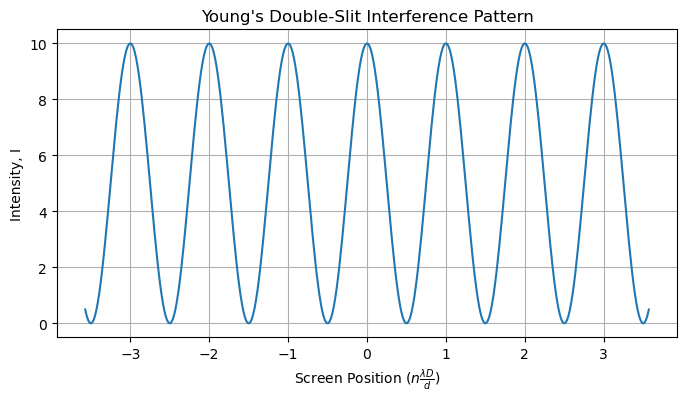

In [26]:
# YOUNG'S DOUBLE SLIT EXPERIMENT

import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

lambda_symbol, d_symbol, D_symbol = sp.symbols('lambda d D')   
# Constants
v_value = 4.3e14            # Frequency in Hz (not used directly here)
lambda_value = 7e-7         # Wavelength in meters
d = 1e-5                    # Slit separation in meters
D = 1                       # Distance to screen in meters
I0 = 10                     # Maximum intensity

# Define screen positions (using small-angle approximation, in meters)
y_values = np.linspace(-0.25, 0.25, 400)  # y values near the central maximum

# Compute the phase difference:
# For small angles, path difference Δx ≈ (d*y)/D, so phase difference φ = (2π/λ)*Δx.
phi = (2 * np.pi / lambda_value) * (d * y_values / D)

# Interference pattern (I = I0 cos^2(φ/2))
I_net_values = I0 * np.cos(phi/2)**2

# Plot the result
plt.figure(figsize=(8, 4))
plt.plot(y_values/(lambda_value*D)*d, I_net_values)
plt.xlabel(r"Screen Position ($n\frac{\lambda D}{d}$)")
plt.ylabel("Intensity, I")

plt.title("Young's Double-Slit Interference Pattern")

plt.grid(True)
plt.show()



# single slit diffraction 

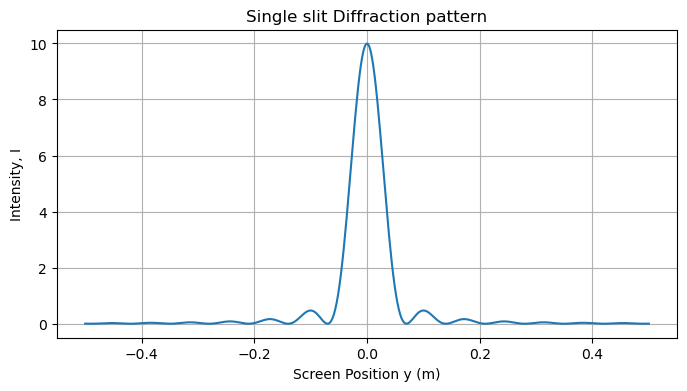

In [2]:
k = 2*np.pi/(lambda_value)
beta = 1/2*(k*y_values*d/D)
y_values = np.linspace(-0.5, 0.5, 400)
I_net_values = I0*np.sin(beta)**2/(beta**2)


plt.figure(figsize=(8, 4))
plt.plot(y_values, I_net_values)
plt.xlabel("Screen Position y (m)")
plt.ylabel("Intensity, I")

plt.title("Single slit Diffraction pattern")

plt.grid(True)
plt.show()

# for y, I in zip(y_values, I_net_values):
#     print(f"{y}: {I}")




# Thin Film interferrence

C:\Users\Bakul\AppData\Local\Temp\ipykernel_9372\3129428983.py:57: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=vibyor_cmap), label='Lambda (meters)')


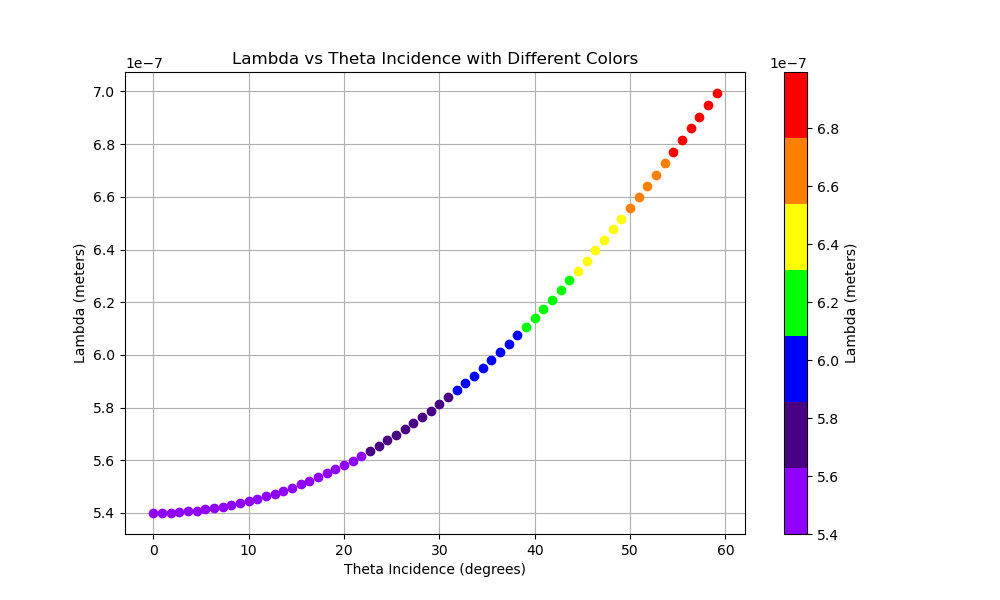

In [5]:
# %matplotlib widget
from matplotlib.colors import ListedColormap

t = 1e-7
n = 1.35
theta_incidence = None
lambda_ = None

lambda_value = []
theta_incidence_values = []
# ? reflection

# for theta_incidence in np.linspace(0, np.pi/2, 100):
#     theta_refraction = np.arcsin(np.sin(theta_incidence)/n)
#     for n_ in range(1,10):
#         lambda_ = 2*t*n/np.cos(theta_refraction)/(n_+1/2)
#         # lambda_value.append(lambda_)
        
# # print(lambda_value)

for theta_incidence in np.linspace(0, np.pi/2, 100):
    theta_refraction = np.arcsin(np.sin(theta_incidence)/n)

    lambda_ = 2*t*n/np.cos(theta_refraction)/(1/2)
    if 3.8e-7 < lambda_ < 7e-7:
        lambda_value.append(lambda_)
        theta_incidence_values.append(theta_incidence)
        
    # print(lambda_, theta_incidence*180/np.pi)
    

# Define the vibyor colormap
vibyor_colors = [
    (0.56, 0.0, 1.0),  # Violet
    (0.29, 0.0, 0.51), # Indigo
    (0.0, 0.0, 1.0),   # Blue
    (0.0, 1.0, 0.0),   # Green
    (1.0, 1.0, 0.0),   # Yellow
    (1.0, 0.5, 0.0),   # Orange
    (1.0, 0.0, 0.0)    # Red
]

vibyor_cmap = ListedColormap(vibyor_colors, name='vibyor')

# Normalize lambda values for colormap
norm = plt.Normalize(min(lambda_value), max(lambda_value))

plt.figure(figsize=(10, 6))

for i, lambda_ in enumerate(lambda_value):
    color = vibyor_cmap(norm(lambda_))
    plt.plot(theta_incidence_values[i] * (180 / np.pi), lambda_,'o', color=color)

plt.xlabel('Theta Incidence (degrees)')
plt.ylabel('Lambda (meters)')
plt.title('Lambda vs Theta Incidence with Different Colors')
plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=vibyor_cmap), label='Lambda (meters)')
plt.grid(True)
plt.show()



C:\Users\Bakul\AppData\Local\Temp\ipykernel_9372\1867639815.py:57: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=vibyor_cmap), label='Lambda (meters)')


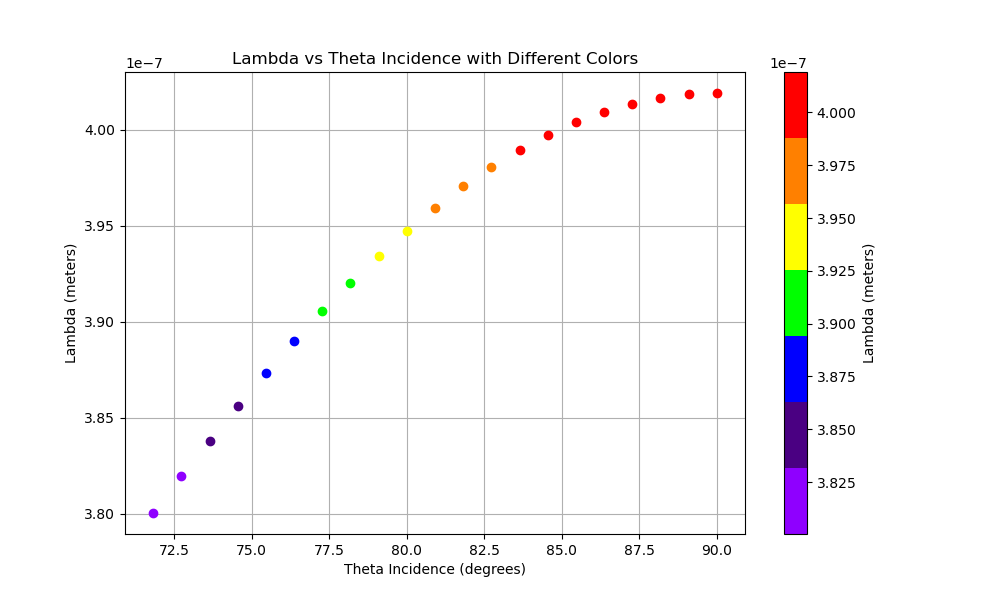

In [ ]:
# %matplotlib widget

#! TODO fix the errror of getting wrong colors associate with wrong wavelenghts not even in the visible range
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

t = 1e-7
n = 1.35
theta_incidence = None
lambda_ = None

lambda_value = []
theta_incidence_values = []
# ? reflection

# for theta_incidence in np.linspace(0, np.pi/2, 100):
#     theta_refraction = np.arcsin(np.sin(theta_incidence)/n)
#     for n_ in range(1,10):
#         lambda_ = 2*t*n/np.cos(theta_refraction)/(n_+1/2)
#         # lambda_value.append(lambda_)
        
# # print(lambda_value)

for theta_incidence in np.linspace(0, np.pi/2, 100):
    theta_refraction = np.arcsin(np.sin(theta_incidence)/n)

    lambda_ = 2*t*n/np.cos(theta_refraction)
    if 3.8e-7 < lambda_ < 7e-7:
        lambda_value.append(lambda_)
        theta_incidence_values.append(theta_incidence)
        
    # print(lambda_, theta_incidence*180/np.pi)
    

# Define the vibyor colormap
vibyor_colors = [
    (0.56, 0.0, 1.0),  # Violet
    (0.29, 0.0, 0.51), # Indigo
    (0.0, 0.0, 1.0),   # Blue
    (0.0, 1.0, 0.0),   # Green
    (1.0, 1.0, 0.0),   # Yellow
    (1.0, 0.5, 0.0),   # Orange
    (1.0, 0.0, 0.0)    # Red
]

vibyor_cmap = ListedColormap(vibyor_colors, name='vibyor')

# Normalize lambda values for colormap
norm = plt.Normalize(min(lambda_value), max(lambda_value))

plt.figure(figsize=(10, 6))

for i, lambda_ in enumerate(lambda_value):
    color = vibyor_cmap(norm(lambda_))
    plt.plot(theta_incidence_values[i] * (180 / np.pi), lambda_,'o', color=color)

plt.xlabel('Theta Incidence (degrees)')
plt.ylabel('Lambda (meters)')
plt.title('Lambda vs Theta Incidence with Different Colors')
plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=vibyor_cmap), label='Lambda (meters)')
plt.grid(True)
plt.show()


what if there were three slits in young's experiment